In [1]:
from mpi4py import MPI
import numpy as np
import dxchange
import torch as tc
import os
import torch as tc
import torch.nn.functional as F
from tqdm import tqdm
import csv

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
fontProperties = {'family': 'serif', 'serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick

In [2]:
## For a 64 x 64 x 64 sample: sample1 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
theta_st = tc.tensor(0).to(dev)
theta_end = tc.tensor(2 * np.pi).to(dev)
n_theta =  tc.tensor(200).to(dev)
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(64).to(dev)
sample_height_n = tc.tensor(64).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"C": 6, "O": 8, "Si": 14, "Ca": 20, "Fe": 26}
probe_energy = np.array([20.0])
probe_cts = tc.tensor(1.0E7).to(dev)
det_size_cm = 0.24
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.1

# path of true grid concentration of the sample #
grid_path = './data/sample1_pad'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #
data_path = './data/sample1_data'
f_XRF_data = 'XRF_sample1'
f_XRT_data = 'XRT_sample1'

# path of storing the intersecting information and the reconstructing results #
recon_path = 'data/sample1_recon'
if not os.path.exists(recon_path):
    os.mkdir(recon_path)
P_save_path = os.path.join(recon_path, 'Intersecting_Length_64_64_64')
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [4]:
## For a 64 x 64 x 64 sample: sample2 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
theta_st = tc.tensor(0).to(dev)
theta_end = tc.tensor(2 * np.pi).to(dev)
n_theta =  tc.tensor(200).to(dev)
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(64).to(dev)
sample_height_n = tc.tensor(64).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"Ca": 20, "Sc": 21}
# this_aN_dic = {"Ca": 20, "Sc": 21, "Ti": 22, "V":23, "Cr":24, "Mn":25, "Fe":26, "Co":27,
#                                                      "Ni": 28, "Cu":29, "Zn":30, "Mo":42}, 
probe_energy = np.array([20.0])
probe_cts = tc.tensor(1.0E7).to(dev)
det_size_cm = 0.24
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.1

# path of true grid concentration of the sample #
grid_path = './data/sample2_pad/nElements_2'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #
data_path = './data/sample2_data/nElements_2'
f_XRF_data = 'XRF_sample2'
f_XRT_data = 'XRT_sample2'

# path of storing the intersecting information and the reconstructing results #
recon_path = 'data/sample2_recon/nElements_2'
if not os.path.exists(recon_path):
    os.mkdir(recon_path)
P_save_path = os.path.join(recon_path, 'Intersecting_Length_64_64_64')
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [6]:
## For a 64 x 64 x 64 sample: sample8 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
theta_st = tc.tensor(0).to(dev)
theta_end = tc.tensor(2 * np.pi).to(dev)
n_theta =  tc.tensor(200).to(dev)
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(64).to(dev)
sample_height_n = tc.tensor(64).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"Ca": 20, "Sc": 21}, 
probe_energy = np.array([20.0])
probe_cts = tc.tensor(1.0E7).to(dev)
det_size_cm = 0.24
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.1

# path of true grid concentration of the sample #
grid_path = './data/sample8_size_64_pad/nElements_2'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #
data_path = './data/sample8_size_64_data/nElements_2'
f_XRF_data = 'XRF_sample8'
f_XRT_data = 'XRT_sample8'

# path of storing the intersecting information and the reconstructing results #
recon_path = 'data/sample8_size_64_recon/limited_solid_angle/Noise/detSpacing_0.4_dpts_5/b_1.56E-5/nElements_2_selfAb_nEpochs_40_nThetas_200_h5test'
P_save_path = os.path.join(recon_path, 'Intersecting_Length_64_64_64')
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [55]:
## For a 64 x 64 x 64 sample: sample7 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
theta_st = tc.tensor(0).to(dev)
theta_end = tc.tensor(2 * np.pi).to(dev)
n_theta =  tc.tensor(60).to(dev)
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(64).to(dev)
sample_height_n = tc.tensor(64).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"Ca": 20, "Sc": 21}, 
probe_energy = np.array([20.0])
probe_cts = tc.tensor(1.0E7).to(dev)
det_size_cm = 0.24
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.1

# path of true grid concentration of the sample #
grid_path = './data/sample7_size_64_pad/nElements_2'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #
data_path = './data/sample7_size_64_data/nElements_2'
f_XRF_data = 'XRF_sample7'
f_XRT_data = 'XRT_sample7'

# path of storing the intersecting information and the reconstructing results #
recon_path = 'data/sample7_size_64_recon/nElements_2_selfAb_nEpochs_40_nThetas_60_EpochUpdateAb'
P_save_path = os.path.join(recon_path, 'Intersecting_Length_64_64_64')
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [12]:
## For a 8 x 8 x 8 sample: sample6 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
theta_st = tc.tensor(0).to(dev)
theta_end = tc.tensor(2 * np.pi).to(dev)
n_theta =  tc.tensor(25).to(dev)
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(8).to(dev)
sample_height_n = tc.tensor(8).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"C": 6, "O": 8}
probe_energy = np.array([20.0])
probe_cts = tc.tensor(1.0E7).to(dev)
det_size_cm = 0.24
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.1

# path of true grid concentration of the sample #
grid_path = './data/sample6_size_8_pad/nElements_2'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #
data_path = './data/sample6_size_8_data/nElements_2'
f_XRF_data = 'XRF_sample6'
f_XRT_data = 'XRT_sample6'

# path of storing the intersecting information and the reconstructing results #
recon_path = 'data/sample6_size_8_recon/nElements_2'
if not os.path.exists(recon_path):
    os.mkdir(recon_path)
P_save_path = os.path.join(recon_path, 'Intersecting_Length_8_8_8')
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [69]:
## For a 5 x 5 x 5 sample: sample3 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
theta_st = tc.tensor(0).to(dev)
theta_end = tc.tensor(2 * np.pi).to(dev)
n_theta =  tc.tensor(16).to(dev)
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(5).to(dev)
sample_height_n = tc.tensor(5).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"C": 6, "O": 8, "Si": 14, "Ca": 20, "Fe": 26}
probe_energy = np.array([20.0])
probe_cts = tc.tensor(1.0E7).to(dev)
det_size_cm = 0.24
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.1

# path of true grid concentration of the sample #
grid_path = './data/sample3_pad'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #
data_path = './data/sample3_data'
f_XRF_data = 'XRF_sample3'
f_XRT_data = 'XRT_sample3'

# path of storing the intersecting information and the reconstructing results #
recon_path = 'data/sample3_recon'
if not os.path.exists(recon_path):
    os.mkdir(recon_path)
P_save_path = os.path.join(recon_path, 'Intersecting_Length_5_5_5')
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [20]:
def rotate(arr, theta, dev):
    """
    This function rotates the grid concentration with dimension: (n_element, sample_height_n, sample_size_n, sample_size_n)
    The rotational axis is along dim 1 of the grid
    
    Parameters
    ----------
    arr : torch tensor
        grid concentration
        
    theta : float
        rotation angle in radians (clockwise)
    
    dev : string
        specify "cpu" or the cuda diveice (ex: cuda:0)


    Returns
    -------
    q : torch tensor
        the rotated grid concentration

    """
    
    m0 = tc.tensor([tc.cos(theta), -tc.sin(theta), 0.0], device=dev)
    m1 = tc.tensor([tc.sin(theta), tc.cos(theta), 0.0], device=dev)
    m = tc.stack([m0, m1]).view(1, 2, 3)
    m = m.repeat([arr.shape[0], 1, 1])
    
    g = F.affine_grid(m, arr.shape)
    q = F.grid_sample(arr, g, padding_mode='border')
    
    return q

## Plot the ground truth

In [33]:
print(np.mean(gt))

0.15980357384956403


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


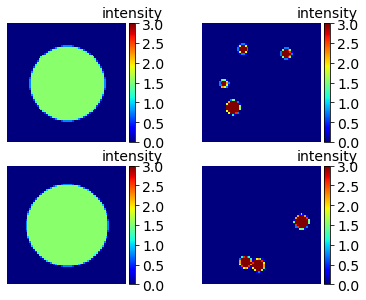

In [4]:
# layer_idx_ls = range(0,5,1)
layer_idx_ls = [30, 40]


gt = np.load(os.path.join(grid_path, f_grid))

image_size = gt.shape[-1]
fig6 = plt.figure(figsize=(4 * gt.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = gt.shape[0], width_ratios=[1] * gt.shape[0])


for element_idx in range(gt.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(gt[element_idx,layer_idx], cmap='jet', vmin=0, vmax=3.0, extent=[0, image_size, image_size, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.arange(0,3.5,0.5)
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')

In [11]:
print(np.mean(recon))

0.0034081945


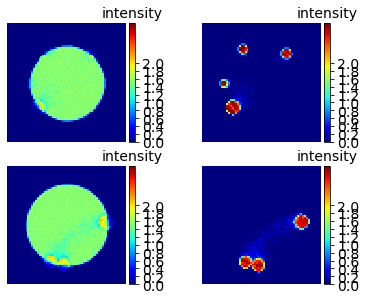

In [7]:
recon = np.load(os.path.join(recon_path, f_recon_grid + '.npy'))

image_size = recon.shape[-1]
fig6 = plt.figure(figsize=(4 * recon.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon.shape[0], width_ratios=[1] * recon.shape[0])


for element_idx in range(recon.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=3.0, extent=[0, image_size, image_size, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')

In [29]:
## For a 64 x 64 x 64 sample: sample8 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
theta_st = tc.tensor(0).to(dev)
theta_end = tc.tensor(2 * np.pi).to(dev)
n_theta =  tc.tensor(200).to(dev)
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(64).to(dev)
sample_height_n = tc.tensor(64).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"Ca": 20, "Sc": 21}, 
probe_energy = np.array([20.0])
probe_cts = tc.tensor(1.0E7).to(dev)
det_size_cm = 0.24
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.1

# path of true grid concentration of the sample #
grid_path = './data/sample8_size_64_pad/nElements_2'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #
data_path = './data/sample8_size_64_data/nElements_2'
f_XRF_data = 'XRF_sample8'
f_XRT_data = 'XRT_sample8'

# path of storing the intersecting information and the reconstructing results #
recon_path = 'data/sample8_size_64_recon/nElements_2_selfAb_nEpochs_40_nThetas_60'
P_save_path = os.path.join(recon_path, 'Intersecting_Length_64_64_64')
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

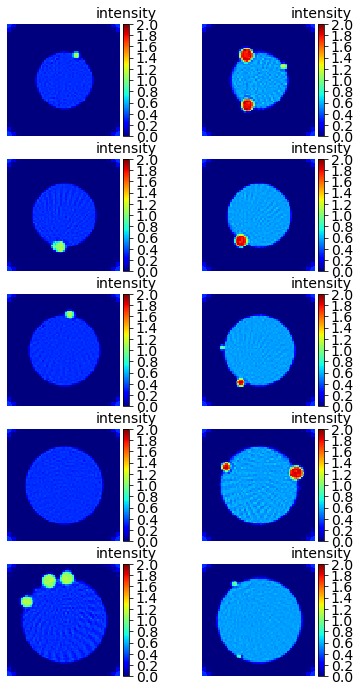

In [5]:
recon = np.load(os.path.join(recon_path, f_recon_grid + '.npy'))

image_size = recon.shape[-1]
fig6 = plt.figure(figsize=(4 * recon.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon.shape[0], width_ratios=[1] * recon.shape[0])


for element_idx in range(recon.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=2.0, extent=[0, image_size, image_size, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')

data/sample8_size_64_recon/limited_solid_angle/Noise/detSpacing_0.4_dpts_5/b_1.56E-5/nElements_2_selfAb_nEpochs_40_nThetas_200_test/initialized_grid_concentration.npy


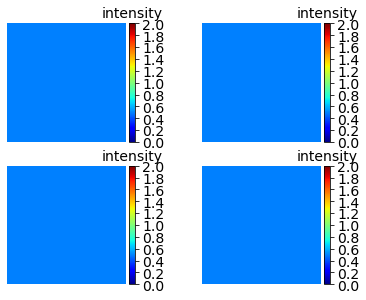

In [9]:
recon_ini = np.load(os.path.join(recon_path, f_initial_guess)+'.npy')
print(os.path.join(recon_path, f_initial_guess)+'.npy')
image_size = recon_ini.shape[-1]
fig6 = plt.figure(figsize=(4 * recon_ini.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon_ini.shape[0], width_ratios=[1] * recon_ini.shape[0])


for element_idx in range(recon_ini.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(recon_ini[element_idx,layer_idx], cmap='jet', vmin=0, vmax=2.0, extent=[0, 5, 5, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')

In [8]:
recon_2 = np.load(os.path.join(recon_path, 'b_1Em3_lr_1Em3_randn_theta_0_10epoch')+'/grid_concentration.npy')

image_size = recon_2.shape[-1]
fig6 = plt.figure(figsize=(4 * recon_2.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon_2.shape[0], width_ratios=[1] * recon_2.shape[0])


for element_idx in range(recon_2.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(recon_2[element_idx,layer_idx], cmap='jet', vmin=0, vmax=2.0, extent=[0, 5, 5, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')

FileNotFoundError: [Errno 2] No such file or directory: 'data/sample3_recon/b_1Em3_lr_1Em3_randn_theta_0_10epoch/grid_concentration.npy'

In [44]:
print(recon_ini == recon_2)

[[[[ True  True  True ... False False False]
   [ True False  True ... False False  True]
   [False  True False ... False  True False]
   ...
   [ True  True  True ...  True False False]
   [ True False  True ...  True False False]
   [ True  True False ...  True  True  True]]

  [[ True  True False ...  True False False]
   [ True  True False ...  True False False]
   [ True  True False ...  True False  True]
   ...
   [ True False False ...  True False False]
   [ True False False ...  True False  True]
   [False  True  True ...  True  True False]]

  [[False  True  True ... False False  True]
   [False  True False ...  True False  True]
   [False False False ... False  True False]
   ...
   [ True  True False ... False  True  True]
   [False  True False ...  True  True False]
   [ True False False ...  True  True  True]]

  ...

  [[ True False False ... False  True False]
   [False  True  True ...  True  True  True]
   [ True  True False ... False  True False]
   ...
   [ True Fals

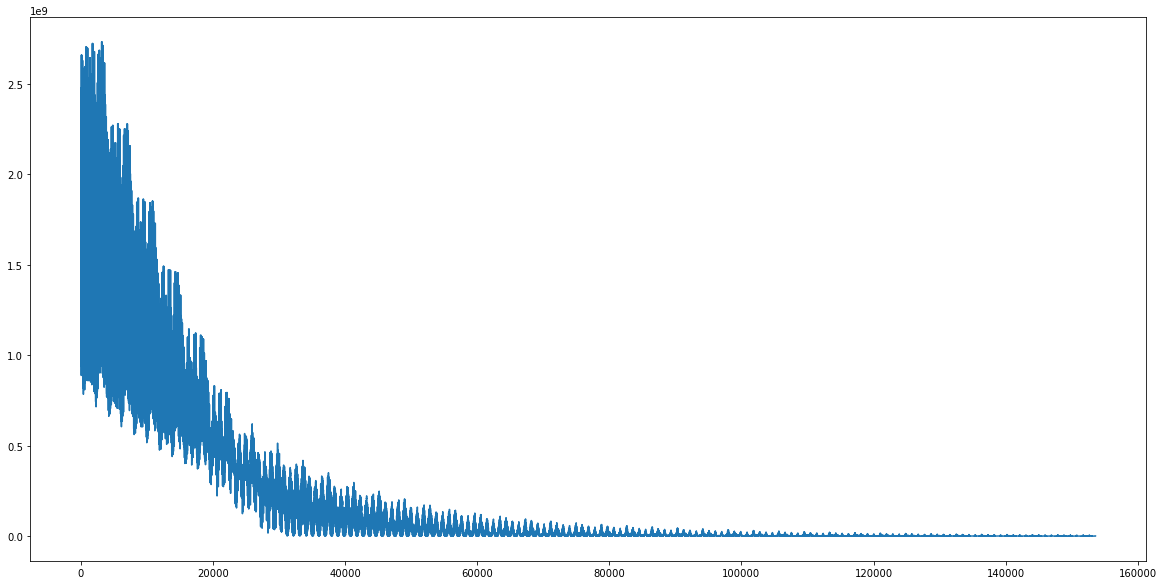

In [44]:
plt.figure(figsize=(20,10))
loss_minibatch =  np.load(os.path.join(recon_path, 'loss_minibatch.npy')).astype(np.float32)
plt.plot(loss_minibatch)

In [6]:
recon_path_ThetaUpdateAb = 'data/sample7_size_64_recon/nElements_2_slefAb_nEpochs_40_nThetas_60'
recon_path_EpochUpdateAb = 'data/sample7_size_64_recon/nElements_2_selfAb_nEpochs_40_nThetas_60_EpochUpdateAb'
recon_path_ThetaUpdateAb_nThetas_200 = 'data/sample7_size_64_recon/nElements_2_selfAb_nEpochs_40'

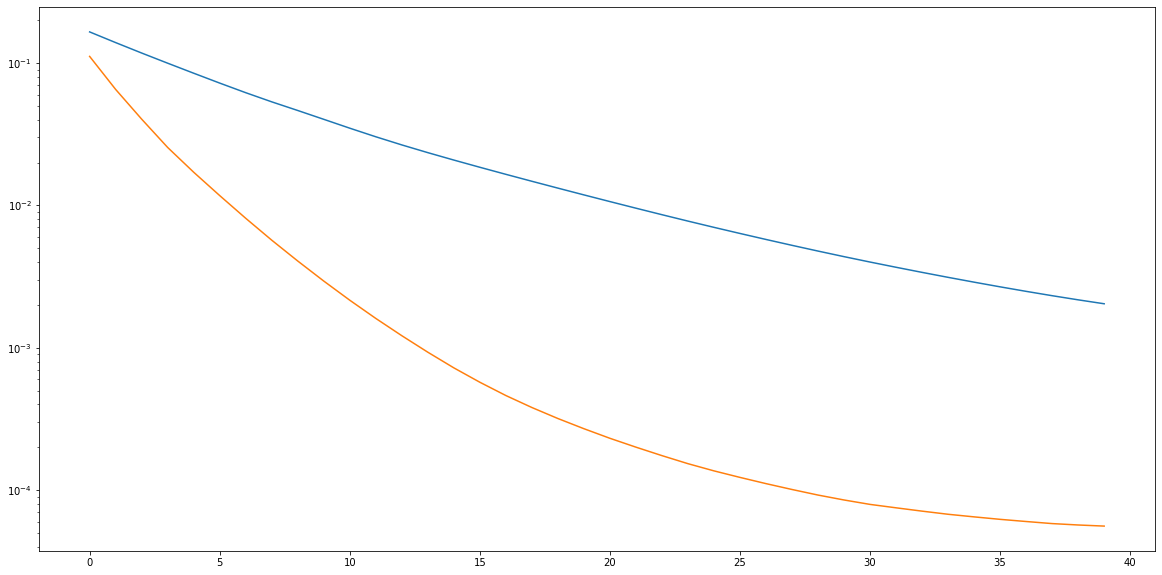

In [24]:
plt.figure(figsize=(20,10))

# x = range(40)
mse_model_ThetaUpdateAb =  np.load(os.path.join(recon_path_ThetaUpdateAb, 'mse_model.npy')).astype(np.float32)
mse_model_ThetaUpdateAb_nThetas_200 =  np.load(os.path.join(recon_path_ThetaUpdateAb_nThetas_200, 'mse_model.npy')).astype(np.float32)
plt.plot(x, mse_model_ThetaUpdateAb)
plt.plot(x, mse_model_ThetaUpdateAb_nThetas_200)

plt.yscale('log')

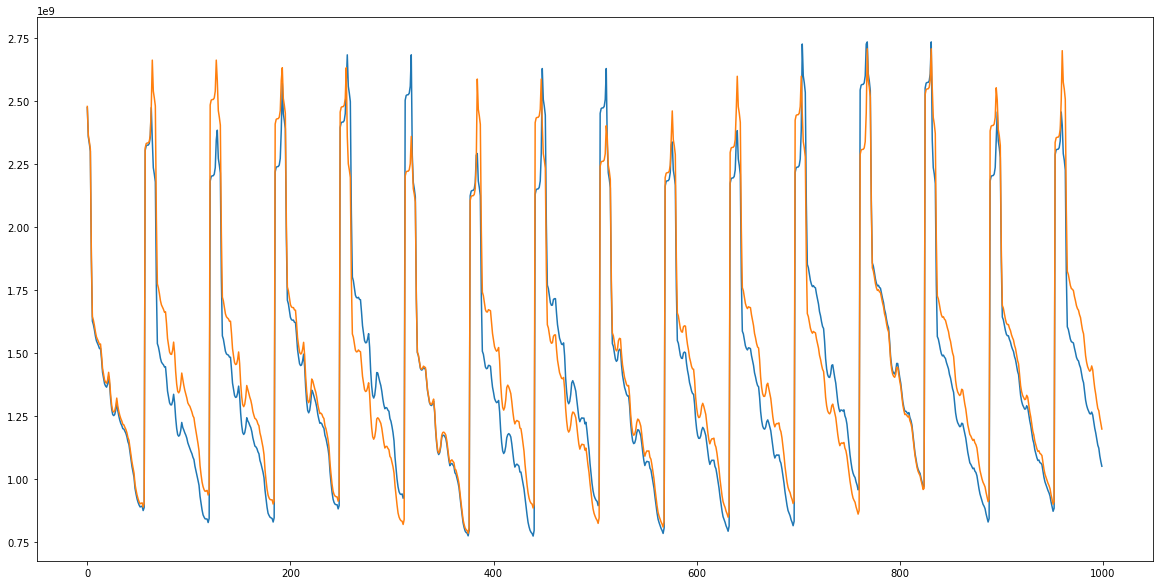

In [53]:
plt.figure(figsize=(20,10))
loss_minibatch_ThetaUpdateAb =  np.load(os.path.join(recon_path_ThetaUpdateAb, 'loss_minibatch.npy')).astype(np.float32)
loss_minibatch_EpochUpdateAb =  np.load(os.path.join(recon_path_EpochUpdateAb, 'loss_minibatch.npy')).astype(np.float32)
plt.plot(loss_minibatch_ThetaUpdateAb[0:1000])
plt.plot(loss_minibatch_EpochUpdateAb[0:1000])

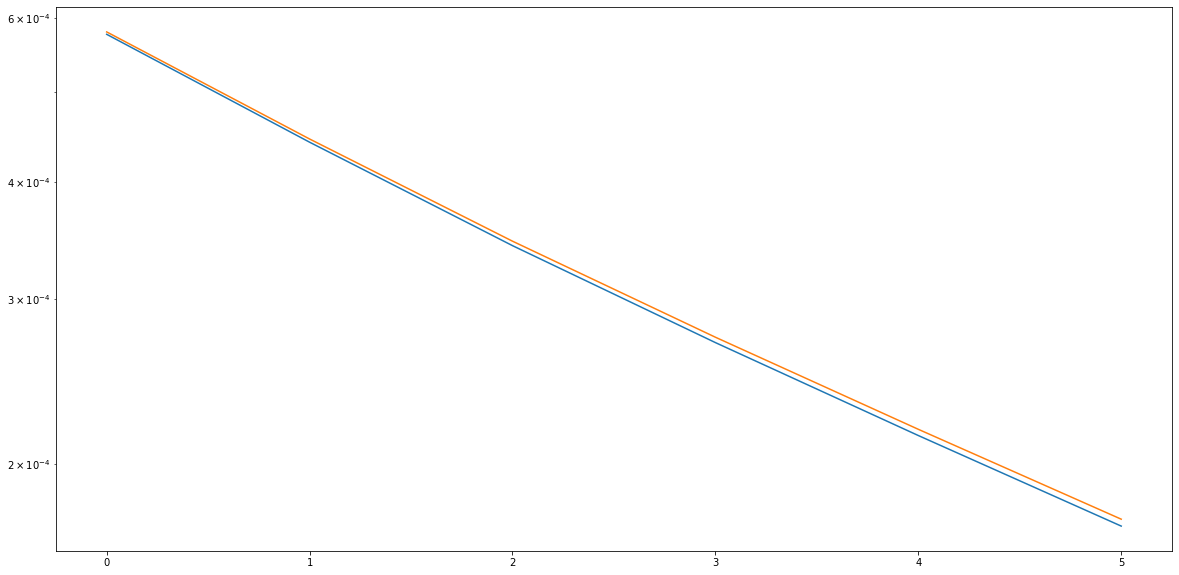

In [16]:
recon_path_dpts_5 = 'data/sample2_recon/nElements_2/mb_size_64/detSpacing_0.1_dpts_5'
recon_path_dpts_21 = 'data/sample2_recon/nElements_2/mb_size_64/detSpacing_0.05_dpts_21'

plt.figure(figsize=(20,10))

mse_model_dpts_5 =  np.load(os.path.join(recon_path_dpts_5, 'mse_model.npy')).astype(np.float32)
mse_model_dpts_21 =  np.load(os.path.join(recon_path_dpts_21, 'mse_model.npy')).astype(np.float32)
plt.plot(mse_model_dpts_5[14:])
plt.plot(mse_model_dpts_21[14:])
plt.yscale('log')

In [ ]:
mse_epoch =  np.load(os.path.join(recon_path, 'mse_model_elements.npy')).astype(np.float32)

fig7 = plt.figure(figsize=(gt.shape[0]*6, 4))
gs7 = gridspec.GridSpec(nrows=1, ncols=gt.shape[0], width_ratios=[1]*gt.shape[0])
for i in range(gt.shape[0]):
    fig7_ax1 = fig7.add_subplot(gs7[0,i])
    fig7_ax1.plot(mse_epoch[:,i])
    fig7_ax1.set_xlabel('epoch')
    fig7_ax1.set_ylabel('mse of model (each element)')
    fig7_ax1.set_title(str(list(this_aN_dic.keys())[i]))
    fig7_ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%g'))


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


In [21]:
gt = gt = np.load(os.path.join(grid_path, f_grid))
np.save(os.path.join(recon_path, f_initial_guess)+'_rot.npy', recon_ini)

  0%|          | 0/5 [00:00<?, ?it/s]/home/hpphappy/anaconda3/envs/joint_XRF_XRT/lib/python3.7/site-packages/torch/nn/functional.py:3447: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/home/hpphappy/anaconda3/envs/joint_XRF_XRT/lib/python3.7/site-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
100%|██████████| 5/5 [00:49<00:00,  9.98s/it]


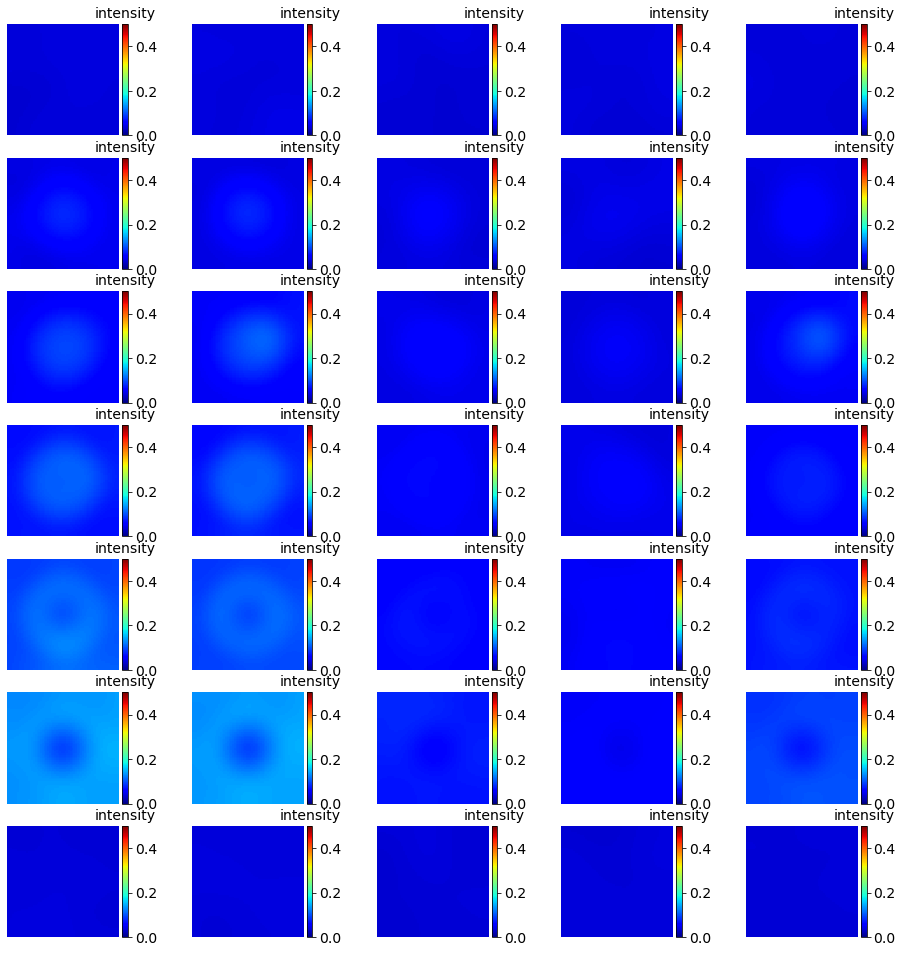

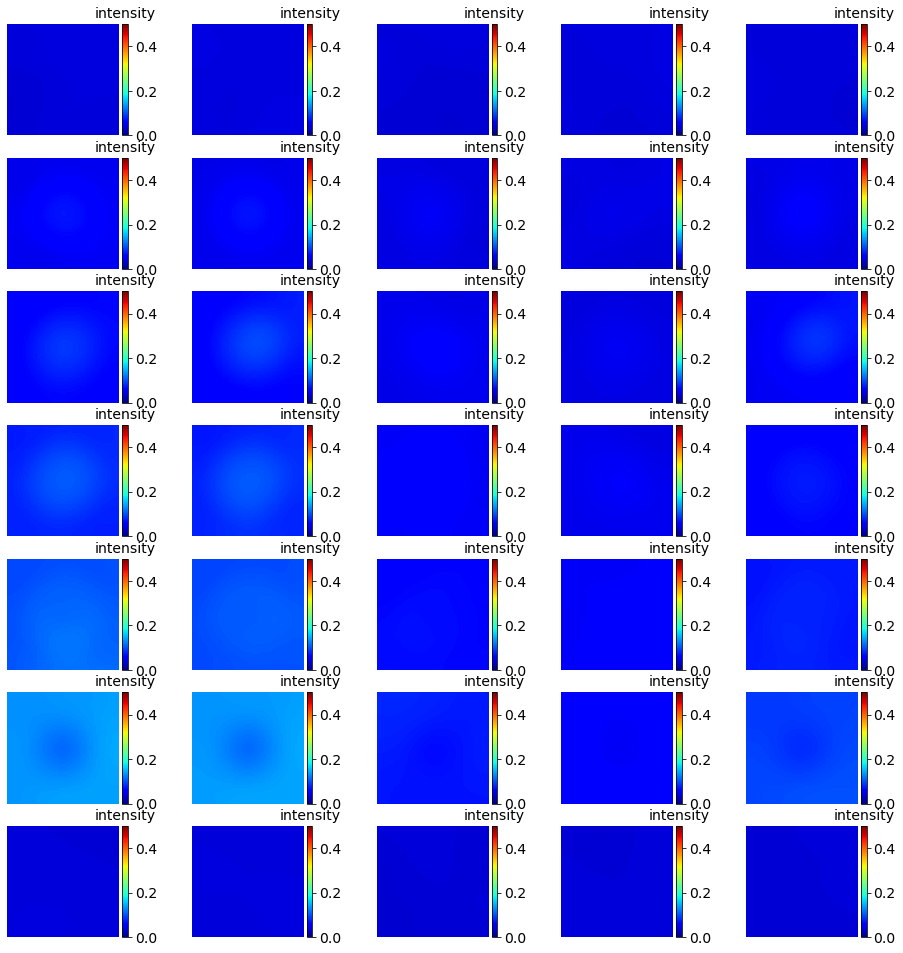

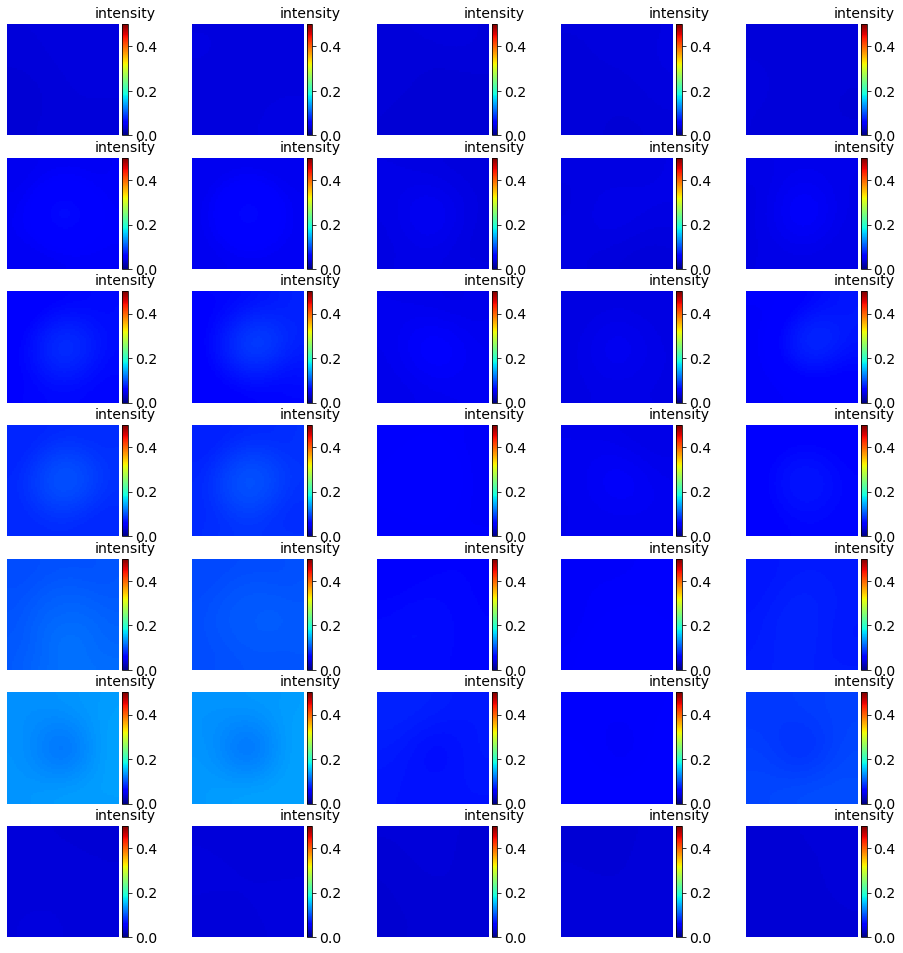

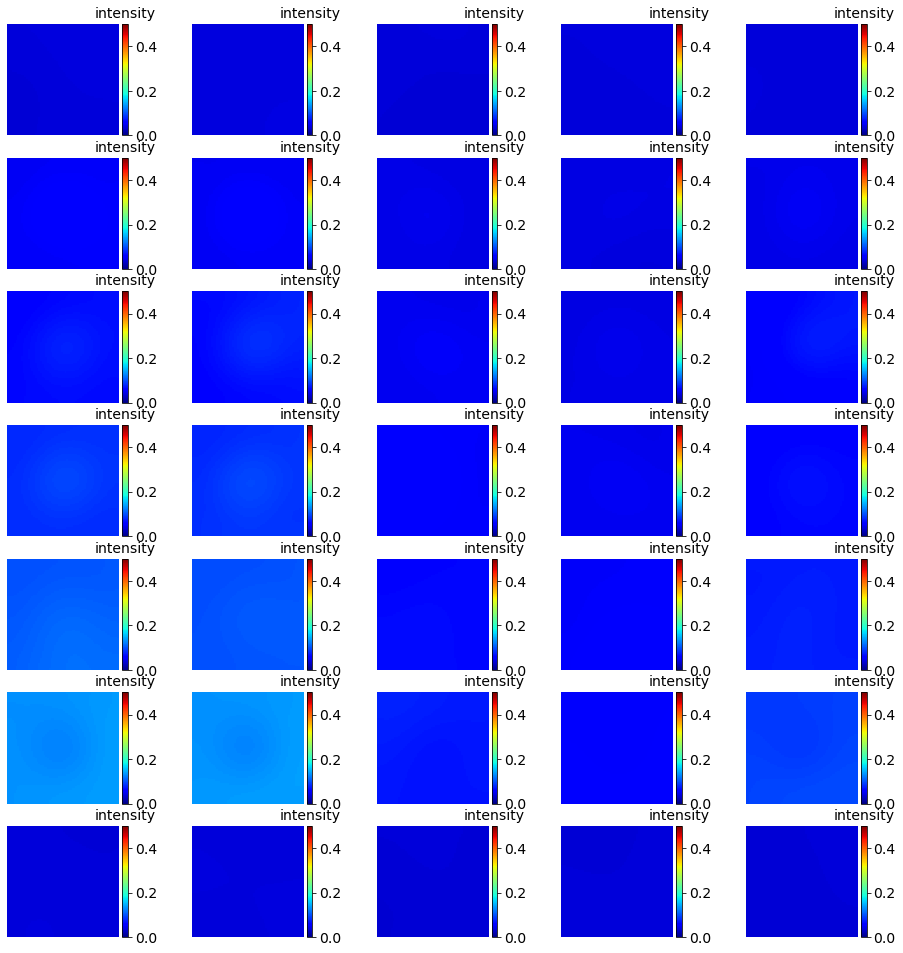

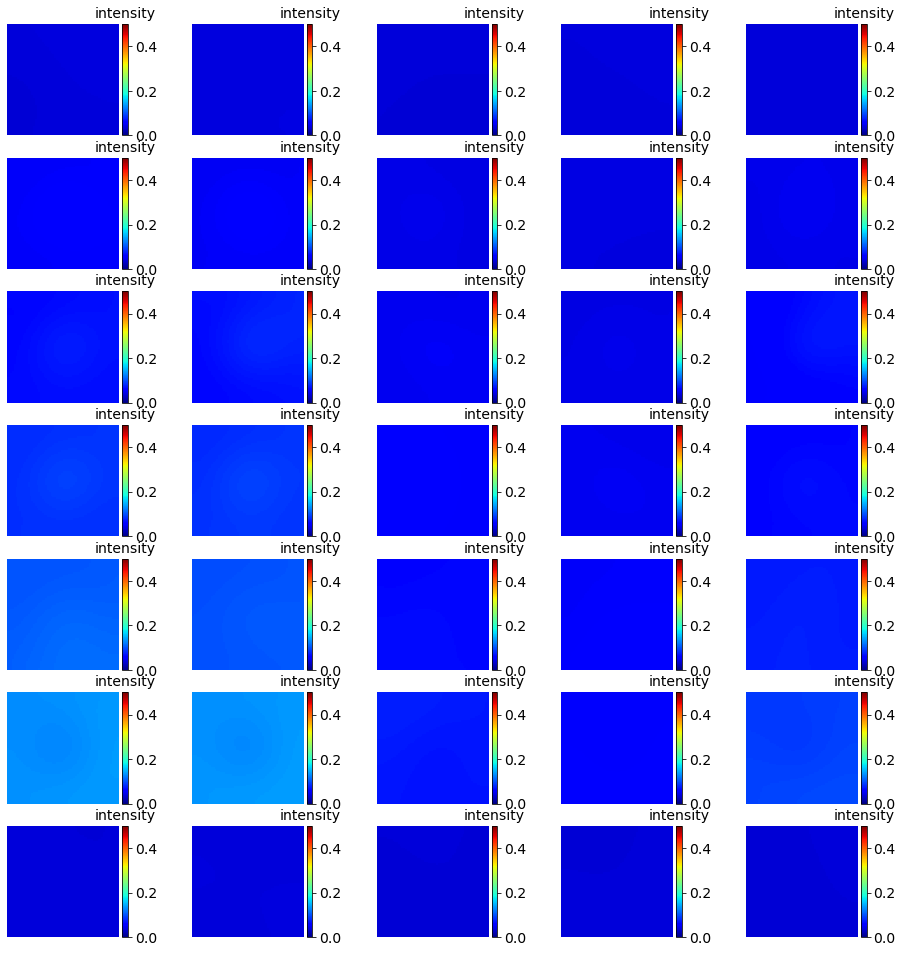

In [23]:
n_epoch = 5
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1).to(dev)
tc.manual_seed(7)
rand_idx = tc.randperm(theta_ls.nelement())
# theta_ls_rand = theta_ls[rand_idx]

image_size = recon_ini.shape[-1]

for epoch in tqdm(range(n_epoch)):
    for this_theta_idx, theta in enumerate(theta_ls):
        recon_ini = tc.from_numpy(np.load(os.path.join(recon_path, f_initial_guess)+'_rot.npy')).float()
        recon_ini = rotate(recon_ini, theta, 'cpu') 

        recon_ini = rotate(recon_ini, -theta, 'cpu')
        np.save(os.path.join(recon_path, f_initial_guess)+'_rot.npy', recon_ini.numpy())
    
#     if epoch % 5 == 0:
    fig6 = plt.figure(figsize=(4 * recon_ini.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
    gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon_ini.shape[0], width_ratios=[1] * recon_ini.shape[0])
    for element_idx in range(recon_ini.shape[0]):
        for idx, layer_idx in enumerate(layer_idx_ls):

            fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
            fig6_ax1.set_xticks(np.arange(0, image_size, 1))
            fig6_ax1.set_yticks(np.arange(0, image_size, 1))
            # fig6_ax1.grid(color='w', linewidth=2)
            fig6_ax1.axis('off')
            pos = fig6_ax1.imshow(recon_ini[element_idx,layer_idx], cmap='jet', vmin=0, vmax=0.5, extent=[0, 5, 5, 0], origin='upper')
            divider = make_axes_locatable(fig6_ax1)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
            cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
            cbar.ax.tick_params(labelsize=14) 
            cbar.ax.set_title('intensity', size='14')
    plt.savefig(os.path.join(recon_path, 'rot_epoch_{}'.format(epoch))+'.pdf')     

In [13]:
theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[0:3].to(dev)
for this_theta_idx, theta in enumerate(theta_ls):
    a = os.path.join(recon_path, 'rot_{}'.format(this_theta_idx))+'.pdf'
    print(a)

data/sample1_recon/rot_0.pdf
data/sample1_recon/rot_1.pdf
data/sample1_recon/rot_2.pdf


In [39]:
def print_flush(val, save_stdout=True, output_folder='./', output_file=''):
    # I want the file name to be the name of the quantity, the text is the value of the quantity
    print(val)
    if not os.path.exists(output_folder):
        os.mkdir(output_folder)   
    
    if not output_file:
        output_file = "stdo.txt"
        
    file_path = os.path.join(output_folder, output_file)
    with open(file_path, 'a') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerow([val])
     
    return None

In [47]:
text = 2.0001
output_folder = "test"
output_file = "stdout.csv"

In [48]:
print_flush(text, save_stdout=True, output_folder=output_folder, output_file=output_file)

2.0001


In [49]:
a = ''
print(not a)

True


In [67]:
n_theta = 11
theta_ls = tc.linspace(0, 1, n_theta)
tc.manual_seed(0)
rand_idx = tc.randperm(n_theta)
theta_ls = theta_ls[rand_idx]

print(theta_ls)
for idx, theta in enumerate(theta_ls): 
    this_theta_idx = rand_idx[idx]
    print(this_theta_idx)
    print(theta)

tensor([1.0000, 0.0000, 0.4000, 0.3000, 0.5000, 0.8000, 0.2000, 0.1000, 0.9000,
        0.7000, 0.6000])
tensor(10)
tensor(1.)
tensor(0)
tensor(0.)
tensor(4)
tensor(0.4000)
tensor(3)
tensor(0.3000)
tensor(5)
tensor(0.5000)
tensor(8)
tensor(0.8000)
tensor(2)
tensor(0.2000)
tensor(1)
tensor(0.1000)
tensor(9)
tensor(0.9000)
tensor(7)
tensor(0.7000)
tensor(6)
tensor(0.6000)


In [33]:
comm = MPI.COMM_WORLD
n_ranks = comm.Get_size()
rank = comm.Get_rank()

gpu_index = 0
dev = tc.device('cuda:{}'.format(gpu_index))

In [34]:
print("Process", rank, "running on", dev)

Process 0 running on cuda:0


In [45]:
import datetime
str(datetime.datetime.today())

'2021-01-09 20:36:58.607200'